# Análise exploratória de métricas de pedidos

Neste notebook realizamos uma análise exploratória das métricas construídas no processo de modelagem dos pedidos.

O foco aqui **não é a construção de KPIs corporativos**, mas sim a compreensão da **distribuição, variabilidade e relação entre métricas operacionais** associadas aos pedidos.

As análises apresentadas têm caráter **descritivo e exploratório**, servindo como base para interpretações futuras, validações de hipóteses ou etapas posteriores de modelagem.

## Fonte dos dados

As métricas analisadas neste notebook foram previamente construídas no notebook de modelagem de pedidos.

O dataset utilizado representa cada pedido como uma unidade analítica, já contendo:

- Métricas agregadas de itens
- Informações de status do pedido
- Métricas temporais derivadas do fluxo operacional

Neste notebook **não realizamos transformações estruturais**, apenas análises exploratórias.

## Visão geral das métricas

Antes de aprofundar a análise visual, realizamos uma inspeção geral das métricas numéricas disponíveis.

Essa etapa permite compreender a escala, dispersão e valores extremos das métricas, auxiliando na interpretação dos gráficos subsequentes.

## Distribuição das métricas de valor e volume

Nesta seção analisamos a distribuição das métricas relacionadas ao valor financeiro e à quantidade de itens por pedido.

O objetivo é identificar padrões como:
- Concentração de pedidos de baixo ou alto valor
- Assimetria nas distribuições
- Presença de caudas longas ou valores extremos

## Distribuição das métricas temporais

Aqui exploramos a distribuição das métricas relacionadas ao tempo ao longo do fluxo do pedido, como aprovação, envio e entrega.

Essas métricas ajudam a entender a variabilidade operacional e possíveis gargalos no processo logístico.

## Relações entre métricas

Nesta etapa analisamos relações entre pares de métricas para identificar possíveis padrões ou dependências.

O foco é exclusivamente exploratório, sem inferência estatística ou modelagem preditiva.


## Análises segmentadas

Por fim, realizamos análises segmentadas com base em características dos pedidos, como status ou faixas de valor.

Essas segmentações permitem observar como as métricas se comportam em diferentes contextos operacionais.

## Síntese exploratória

Nesta análise exploratória observamos padrões relevantes nas distribuições e relações entre métricas operacionais dos pedidos.

As conclusões apresentadas aqui não representam avaliações de desempenho, mas sim uma base analítica para investigações futuras e aprofundamentos específicos.

## Carregamento dos dados modelados

Neste notebook utilizamos a tabela de pedidos previamente modelada no notebook 03.
Essa tabela já contém métricas agregadas por pedido, além de atributos temporais e
informações de status provenientes do dataset de pedidos.

O objetivo aqui **não é reconstruir dados**, mas sim **analisar, visualizar e interpretar**
as métricas já estruturadas, garantindo uma separação clara entre modelagem e análise.

Nesta etapa realizamos apenas:
- A leitura do arquivo processado
- Uma inspeção inicial para validação da estrutura

In [1]:
import pandas as pd

DATA_PATH = "../data/processed/pedidos_modelados.parquet"

pedidos_df = pd.read_parquet(DATA_PATH)

## Inspeção inicial da tabela de pedidos

Antes de avançarmos para análises métricas e visualizações, realizamos uma inspeção
inicial da tabela de pedidos modelada.

O objetivo é confirmar:
- Estrutura geral do dataset
- Tipos de dados das colunas
- Presença de valores ausentes
- Dimensão da tabela

In [2]:
pedidos_df.head()

,order_id,qtd_itens_pedido,valor_total_itens,valor_total_frete,valor_total_pedido,ticket_medio_item,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tempo_aprovacao_horas,tempo_envio_dias,tempo_entrega_dias,diferenca_entrega_estimada_dias
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.90,13.29,72.19,58.90,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,0.775833,6.0,7.0,-9.0
1,00018f77f2f0320c557190d7a144bdd3,1,239.90,19.93,259.83,239.90,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,0.201944,8.0,16.0,-3.0
2,000229ec398224ef6ca0657da4fc703e,1,199.00,17.87,216.87,199.00,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,0.249722,1.0,7.0,-14.0
3,00024acbcdf0a6daa1e931b038114c75,1,12.99,12.79,25.78,12.99,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,0.161944,2.0,6.0,-6.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,199.90,18.14,218.04,199.90,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,0.206111,11.0,25.0,-16.0


In [3]:
pedidos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   order_id                         98666 non-null  object        
 1   qtd_itens_pedido                 98666 non-null  int64         
 2   valor_total_itens                98666 non-null  float64       
 3   valor_total_frete                98666 non-null  float64       
 4   valor_total_pedido               98666 non-null  float64       
 5   ticket_medio_item                98666 non-null  float64       
 6   order_status                     98666 non-null  object        
 7   order_purchase_timestamp         98666 non-null  datetime64[ns]
 8   order_approved_at                98652 non-null  datetime64[ns]
 9   order_delivered_carrier_date     97657 non-null  datetime64[ns]
 10  order_delivered_customer_date    96476 non-null  datetime6

In [4]:
pedidos_df.shape

(98666, 16)

## Distribuição das métricas quantitativas

Nesta etapa analisamos a distribuição das principais métricas numéricas construídas
na etapa de modelagem dos pedidos.

O objetivo é compreender:
- A escala dos valores envolvidos
- A presença de assimetrias ou caudas longas
- A existência de possíveis valores extremos

As métricas analisadas neste bloco são:
- Valor total do pedido
- Quantidade de itens por pedido

Essa análise é fundamental para decidir **como interpretar médias, medianas e dispersões**
nas etapas seguintes.

In [5]:
pedidos_df[['valor_total_pedido', 'qtd_itens_pedido']].describe()

,valor_total_pedido,qtd_itens_pedido
count,98666.000000,98666.000000
mean,160.577638,1.141731
std,220.466087,0.538452
min,9.590000,1.000000
25%,61.980000,1.000000
50%,105.290000,1.000000
75%,176.870000,1.000000
max,13664.080000,21.000000


Para complementar a análise numérica, utilizamos visualizações simples que permitem
entender melhor a forma da distribuição das métricas.

Histogramas e boxplots ajudam a identificar:
- Concentração de valores
- Assimetria
- Presença de outliers

In [6]:
import matplotlib.pyplot as plt

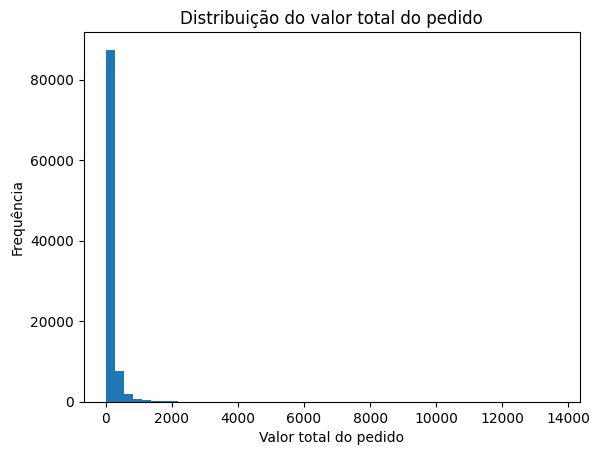

In [7]:
pedidos_df['valor_total_pedido'].plot(kind='hist', bins=50)
plt.title('Distribuição do valor total do pedido')
plt.xlabel('Valor total do pedido')
plt.ylabel('Frequência')
plt.show()

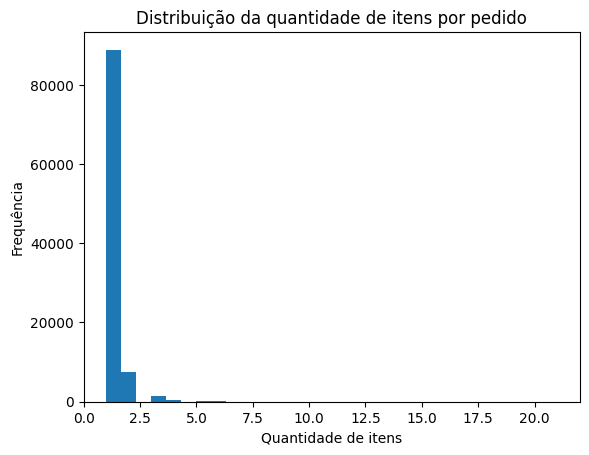

In [8]:
pedidos_df['qtd_itens_pedido'].plot(kind='hist', bins=30)
plt.title('Distribuição da quantidade de itens por pedido')
plt.xlabel('Quantidade de itens')
plt.ylabel('Frequência')
plt.show()

## Análise de concentração dos pedidos

Nesta etapa analisamos como os pedidos se distribuem em termos de valor e quantidade de itens.

O objetivo é compreender se:
- Uma pequena parcela dos pedidos concentra grande parte do valor total
- A maioria dos pedidos é composta por poucos itens
- Existe evidência de cauda longa na distribuição

A análise de concentração é fundamental para entender o comportamento estrutural dos dados
antes de qualquer interpretação de negócio ou definição de métricas de desempenho.

In [12]:
# Ordenar pedidos por valor (do maior para o menor)
valor_concentracao = (
    pedidos_df[['valor_total_pedido']]
    .sort_values('valor_total_pedido', ascending=False)
    .reset_index(drop=True)
)

# Percentual individual
valor_concentracao['percentual'] = (
    valor_concentracao['valor_total_pedido']
    / valor_concentracao['valor_total_pedido'].sum()
)

# Percentual acumulado
valor_concentracao['percentual_acumulado'] = valor_concentracao['percentual'].cumsum()

valor_concentracao.head(10)

,valor_total_pedido,percentual,percentual_acumulado
0,13664.08,0.000862,0.000862
1,7274.88,0.000459,0.001322
2,6929.31,0.000437,0.001759
3,6922.21,0.000437,0.002196
4,6726.66,0.000425,0.002620
5,6081.54,0.000384,0.003004
6,4950.34,0.000312,0.003317
7,4809.44,0.000304,0.003620
8,4764.34,0.000301,0.003921
9,4681.78,0.000296,0.004217


In [13]:
dist_itens = (
    pedidos_df
    .groupby('qtd_itens_pedido')
    .size()
    .reset_index(name='qtd_pedidos')
    .sort_values('qtd_itens_pedido')
)

# Percentual
dist_itens['percentual'] = dist_itens['qtd_pedidos'] / dist_itens['qtd_pedidos'].sum()

# Percentual acumulado
dist_itens['percentual_acumulado'] = dist_itens['percentual'].cumsum()

dist_itens

,qtd_itens_pedido,qtd_pedidos,percentual,percentual_acumulado
0,1,88863,0.900645,0.900645
1,2,7516,0.076176,0.976821
2,3,1322,0.013399,0.990220
3,4,505,0.005118,0.995338
4,5,204,0.002068,0.997405
5,6,198,0.002007,0.999412
6,7,22,0.000223,0.999635
7,8,8,0.000081,0.999716
8,9,3,0.000030,0.999747
9,10,8,0.000081,0.999828


## Segmentação simples dos pedidos

Após compreender a distribuição e a concentração dos pedidos, o próximo passo é segmentá-los
em grupos simples para facilitar comparações e análises posteriores.

Nesta etapa criamos segmentações exploratórias baseadas em:
- Valor total do pedido
- Quantidade de itens por pedido

Essas segmentações não representam regras de negócio nem classificações finais,
mas sim uma forma estruturada de organizar os dados para análise.

In [14]:
# Criar faixas de valor do pedido
pedidos_df['faixa_valor_pedido'] = pd.cut(
    pedidos_df['valor_total_pedido'],
    bins=[0, 50, 150, pedidos_df['valor_total_pedido'].max()],
    labels=['baixo', 'medio', 'alto'],
    include_lowest=True
)

pedidos_df['faixa_valor_pedido'].value_counts(normalize=True)

faixa_valor_pedido
medio    0.503922
alto     0.325249
baixo    0.170829
Name: proportion, dtype: float64

In [15]:
def classificar_itens(qtd):
    if qtd == 1:
        return 'unitario'
    elif qtd <= 3:
        return 'poucos_itens'
    else:
        return 'muitos_itens'


pedidos_df['segmento_itens'] = pedidos_df['qtd_itens_pedido'].apply(classificar_itens)

pedidos_df['segmento_itens'].value_counts(normalize=True)

segmento_itens
unitario        0.900645
poucos_itens    0.089575
muitos_itens    0.009780
Name: proportion, dtype: float64

In [17]:
segmentacao_cruzada = (
    pedidos_df
    .groupby(['faixa_valor_pedido', 'segmento_itens'])
    .size()
    .reset_index(name='qtd_pedidos')
)

segmentacao_cruzada

/tmp/ipykernel_6784/884991495.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['faixa_valor_pedido', 'segmento_itens'])


,faixa_valor_pedido,segmento_itens,qtd_pedidos
0,baixo,muitos_itens,0
1,baixo,poucos_itens,189
2,baixo,unitario,16666
3,medio,muitos_itens,142
4,medio,poucos_itens,3720
5,medio,unitario,45858
6,alto,muitos_itens,823
7,alto,poucos_itens,4929
8,alto,unitario,26339


## Conclusão do notebook

Neste notebook realizamos uma análise exploratória das métricas de pedidos,
focando em distribuição, concentração e segmentação simples.

O objetivo foi compreender a estrutura dos pedidos sem aplicar métricas corporativas
ou interpretações estratégicas, preparando o terreno para análises futuras mais aprofundadas.

Com isso, encerramos o ciclo de análise deste projeto, que seguiu uma abordagem progressiva:
exploração → modelagem → métricas.